In [16]:
#Library loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

reading data

In [2]:
#raw_data
df_raw=pd.read_excel('https://github.com/mmortazavi/ml_demystified/raw/main/projects/gis/raw_data.xlsx') 

In [71]:
#preprocessed data
df_pp= pd.read_csv (r'C:\Users\Asus\Desktop\gis_data\gis_data.csv')
df_pp.drop(['Unnamed: 0'], axis=1,inplace=True)

In [21]:
# feature names #df_raw
print(df_raw.columns)

Index(['نام', 'نام خانوادگی', 'کد ملی', 'موبایل', 'مرحله ثبت نام',
       'شهر مورد تقاضا', 'شهر محل سکونت', 'آدرس متقاضی', 'کدپستی',
       'وضعیت بارگذاری مدارک', 'وضعیت سرپرستی', 'شغل', 'جنسیت',
       'میزان تحصیلات', 'نام پدر', 'شماره شناسنامه', 'تاریخ تولد',
       'تعداد فرزندان', 'بعد خانوار', 'کد شعبه', 'نام شعبه', 'شماره حساب'],
      dtype='object')


In [47]:
# feature names #df_pp
print(df_pp.columns)

Index(['city', 'postal code', 'city_GIS_1', 'city_GIS_2', 'branch_GIS_1',
       'branch_GIS_2', 'postalcode_GIS_1', 'postalcode_GIS_2'],
      dtype='object')


its difficult to work with persian font therefore some feature's names we may need them later should be translated or (mabye) encoded .#df_raw

In [28]:
#df_raw
#کدپستی 
#شهر مورد تقاضا  
#شهر محل سکونت

df_raw.rename(columns={"کدپستی": "postal code", "شهر مورد تقاضا"  : "city_requested " , "شهر محل سکونت" :"city_residance"} , inplace=True)

In [29]:
df_raw[["postal code",'city_residance','city_requested ']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   postal code      6214 non-null   object
 1   city_residance   6899 non-null   object
 2   city_requested   6899 non-null   object
dtypes: object(3)
memory usage: 161.8+ KB


In [31]:
# pd.DataFrame(df_raw['city_residance']).equals(pd.DataFrame(df_raw['city_requested'])) #returns false


In [32]:
df_raw['postal code']

0       3454178378
1       3451738961
2       3451646436
3       3451737955
4       3451637311
           ...    
6894           NaN
6895    3431164685
6896    3416664781
6897    3471679831
6898    3457114379
Name: postal code, Length: 6899, dtype: object

df_pp 

In [46]:
#getting information on df_pp
print(df_pp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              6899 non-null   object 
 1   postal code       6214 non-null   object 
 2   city_GIS_1        6886 non-null   float64
 3   city_GIS_2        6886 non-null   float64
 4   branch_GIS_1      4633 non-null   float64
 5   branch_GIS_2      4633 non-null   float64
 6   postalcode_GIS_1  5197 non-null   float64
 7   postalcode_GIS_2  5179 non-null   float64
dtypes: float64(6), object(2)
memory usage: 431.3+ KB
None


In [48]:
(df_pp['city'].astype('category')).values.categories

Index(['آبگرم', 'آبیک', 'آوج', 'ارداق', 'اسفرورین', 'اصفهان', 'اقبالیه',
       'الوند', 'ایرانشهر', 'بوئین زهرا', 'بیجار', 'بیدستان', 'تاکستان',
       'تهران', 'خاکعلی', 'خرمدشت', 'دانسفهان', 'رازمیان', 'رباطکریم',
       'سگزآباد', 'شال', 'شریفیه', 'شهرجدیدهشتگرد', 'ضیاآباد', 'طارم', 'قزوین',
       'قم', 'مجموعه شهری مهرگان', 'محمدیه', 'محمودآبادنمونه', 'معلم کلایه',
       'نرجه', 'نظرآباد', 'کرج', 'کوهین'],
      dtype='object')

In [50]:
df_pp.groupby('city').count()

,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city,,,,,,,
آبگرم,50,51,51,23,23,38,38
آبیک,615,615,615,225,225,543,543
آوج,215,223,223,92,92,175,175
ارداق,82,82,82,0,0,65,65
اسفرورین,16,16,16,10,10,13,13
اصفهان,1,0,0,0,0,0,0
اقبالیه,389,389,389,326,326,370,370
الوند,157,159,159,146,146,147,147
ایرانشهر,1,0,0,0,0,0,0


In [ ]:
#dealing with missing values

In [51]:
df_pp.isnull().any(axis=0)


city                False
postal code          True
city_GIS_1           True
city_GIS_2           True
branch_GIS_1         True
branch_GIS_2         True
postalcode_GIS_1     True
postalcode_GIS_2     True
dtype: bool

In [62]:
df_pp.dropna(axis=0, how='any', inplace=True)

In [53]:
# Counting  duplicated  rows
print(df_pp.duplicated().sum())

3522


In [ ]:
# df_pp.drop_duplicates(inplace=True)
# im not gonna remove deplicated row since the last time it didnt work and knn model had 23 percent accuracy . 

In [63]:
# encoding 'city'
ecod1= {"city":  {"محمدیه": 'one' , 'مجموعه شهری مهرگان':'two' , 'بوئین زهرا' : 'three' , 'قزوین':'four',
                          'اقبالیه':'five'  , 'تاکستان':'six',  'آبیک': 'seven' ,  'الوند':'eight' , 'آوج':'nine',
                         'دانسفهان':'ten', 'شریفیه':'eleven','بیدستان':'twelve','آبگرم':'thirteen','سگزآباد':"fourteen",
                         'محمودآبادنمونه':'fifteen','اسفرورین':'sixteen','شال':'seventeen','معلم کلایه':'eighteen',
                         'رازمیان':'nineteen', "ضیاآباد":'twenty','خرمدشت':'twenty one'}}


ecod2= {"city":  {"one": 1 , 'two':'2' , 'three' : 3 , 'four':4,'five':5  , 'six':6,
                           'seven': 7 ,  'eight':8 , 'nine':9,'ten':10, 'eleven':11 ,'twelve':12 ,'thirteen':13,
                           'fourteen':14,'fifteen':15,'sixteen':16,'seventeen':17,'eighteen':18,
                            'nineteen':19, "twenty":20 ,'twenty one':21}}

df_pp = df_pp.replace(ecod1)
df_pp = df_pp.replace(ecod2)


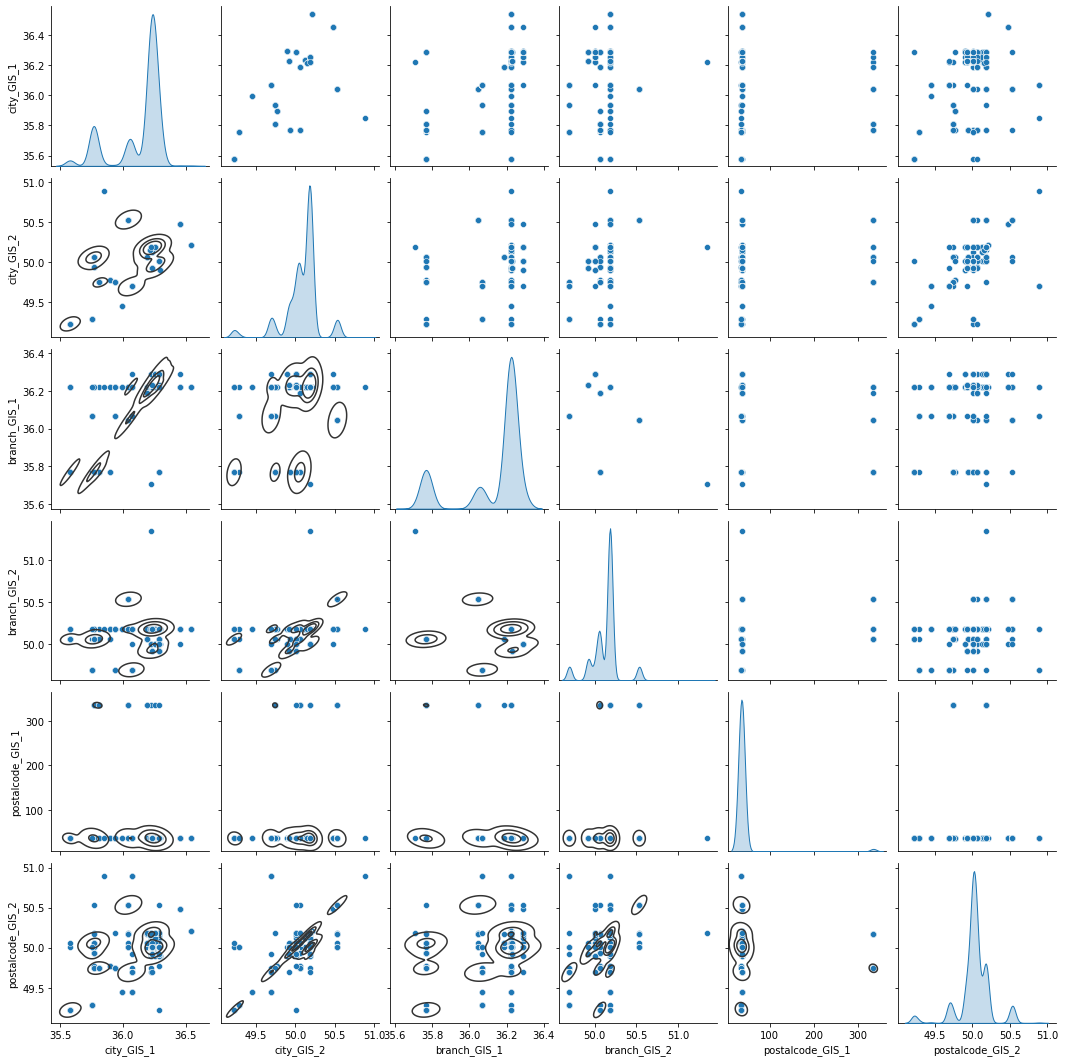

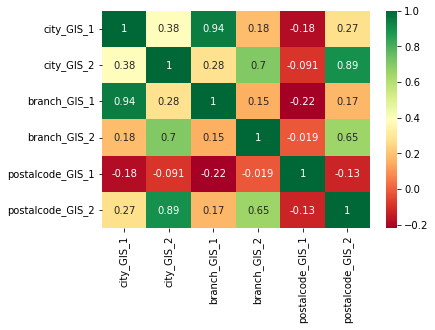

In [64]:
# Data Visualization
sns.pairplot(df_pp, diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()
sns.heatmap(df_pp.corr(),annot=True,cmap ='RdYlGn')
plt.show()



In [65]:
x=df_pp.loc[:, ['city','city_GIS_1','city_GIS_2','branch_GIS_1','branch_GIS_2','postalcode_GIS_1','postalcode_GIS_2']]
y=df_pp.loc[:, ["postal code"]]

In [66]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size=0.4,random_state=42)

In [67]:
#scaling data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [68]:
# Applying PCA :
#     Dimensionality reduction
#     Anomaly detection
#         Decorrelation
    
pca     = PCA()
x_train = pca.fit_transform(x_train)
x_test  = pca.transform(x_test)

In [69]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44735791, 0.23175676, 0.13569022, 0.11493941, 0.0530841 ,
       0.01058628, 0.00658533])

It can be seen that first principal component is responsible for 44.73% variance. 
the second principal component causes 23.17% variance in the dataset. 
Collectively we can say that (44.73 + 23.17) 67.9% percent of the classification information contained in the feature set is captured by the first two principal components.

 using 2 principal components to train our algorithm

In [70]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [71]:
# Training and Making Predictions

In [ ]:
#knn

In [ ]:
test_scores  = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    
    knn.fit(x_train,np.ravel(y_train))
    
    train_scores.append(knn.score(x_train,np.ravel(y_train)))
    
    test_scores.append(knn.score(x_test,np.ravel(y_test)))       



max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))



knn = KNeighborsClassifier(1)

knn.fit(x_train,np.ravel(y_train))
knn.score(x_test,np.ravel(y_test))
y_pred=knn.predict(x_test)

print('accuracy:', accuracy_score(np.ravel(y_test),y_pred))


In [72]:
test_scores  = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    
    knn.fit(x_train,np.ravel(y_train))
    
    train_scores.append(knn.score(x_train,np.ravel(y_train)))
    
    test_scores.append(knn.score(x_test,np.ravel(y_test)))       

In [73]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 98.62637362637363 % and k = [1]


In [74]:
knn = KNeighborsClassifier(1)

knn.fit(x_train,np.ravel(y_train))
knn.score(x_test,np.ravel(y_test))
y_pred=knn.predict(x_test)

print('accuracy:', accuracy_score(np.ravel(y_test),y_pred))

accuracy: 0.9862637362637363


In [75]:
#random_forest

In [76]:
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size=0.2 , random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

pca     = PCA()
x_train2 = pca.fit_transform(x_train)
x_test2 = pca.transform(x_test)

# explained_variance2 = pca.explained_variance_ratio_ : 2 PC
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [77]:
n_estimators =[5,20,50,100]
max_depth = list(range(1, 20))

random_grid = {'n_estimators': n_estimators,'max_depth': max_depth}
                 
                 
rfc_rndm = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = random_grid, cv = 3,
                                 n_jobs = -1).fit(x_train2,np.ravel(y_train))

print ('Best Param: ', rfc_rndm.best_params_, ' \n')

Best Param:  {'n_estimators': 20, 'max_depth': 14}  



In [78]:
rfc = RandomForestClassifier(n_estimators=20 , max_depth= 14).fit(x_train,np.ravel(y_train))

yy_pred = rfc.predict(x_test)
print (accuracy_score(y_test, yy_pred))

0.9848901098901099


New soloution;


Attempting to remove duplicated and filling Nan values .
after that accuracy of the new KNN will show whether the new solution is efficient or not.  #df_pp

In [329]:
#preprocessed data
df_pp= pd.read_csv (r'C:\Users\Asus\Desktop\gis_data\gis_data.csv')
df_pp.drop(['Unnamed: 0'], axis=1,inplace=True)

based on #df_pp.groupby('city').count()'s result , its better to drop rows indexed by "اصفهان" ,"ایرانشهر","بیجار","خاکعلی","تهران","خرمدشت","رباطکریم","شهرجدیدهشتگرد","طارم","قم","نرجه","نظرآباد","کرج" in city coloumn.

In [330]:
df_pp.drop(df_pp.index[df_pp['city'] == "کرج" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "نظرآباد" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "نرجه" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "قم" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "طارم" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "شهرجدیدهشتگرد" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "رباطکریم" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "خرمدشت" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "تهران" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "خاکعلی" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "بیجار" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "ایرانشهر" ], inplace=True)
df_pp.drop(df_pp.index[df_pp['city'] == "اصفهان" ], inplace=True)

#df_pp.groupby('city').count()

In [331]:
(df_pp['city'].astype('category')).values.categories

Index(['آبگرم', 'آبیک', 'آوج', 'ارداق', 'اسفرورین', 'اقبالیه', 'الوند',
       'بوئین زهرا', 'بیدستان', 'تاکستان', 'دانسفهان', 'رازمیان', 'سگزآباد',
       'شال', 'شریفیه', 'ضیاآباد', 'قزوین', 'مجموعه شهری مهرگان', 'محمدیه',
       'محمودآبادنمونه', 'معلم کلایه', 'کوهین'],
      dtype='object')

In [332]:
#label-encoding ; " city " => "city_1"

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
df_pp['city_1'] = labelencoder.fit_transform(df_pp['city'])


In [333]:
#Set the index to become the 'city_1' column:
df_pp.set_index('city_1',inplace=True)

In [334]:
#sort dataframe by index in ascending order
df_pp.sort_index(ascending=True,inplace=True)

#filling nans

note: The below cells can be simply summarized by defining the function to one or two cells,  but studying on dataset's details is one of the  new solution's goals.

In [335]:
#آبگرم 
res0 = df_pp.loc[0]
#duplicated
res0.drop_duplicates(inplace=True)

#filling nan values
res0['branch_GIS_1'].fillna(int(res0['branch_GIS_1'].mean()),inplace=True)
res0['branch_GIS_2'].fillna(int(res0['branch_GIS_2'].mean()),inplace=True)
res0['postalcode_GIS_1'].fillna(int(res0['postalcode_GIS_1'].mean()),inplace=True)
res0['postalcode_GIS_2'].fillna(int(res0['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res0.dropna(axis=0, how='any', inplace=True)

res0

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1442088616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res0.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1442088616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res0['branch_GIS_1'].fillna(int(res0['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1442088616.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
0,آبگرم,"35.756778, 49.285750",35.756778,49.28575,36.069361,49.694056,35.756778,49.285750
0,آبگرم,"35.756778, 49.285750",35.756778,49.28575,36.000000,49.000000,35.756778,49.285750
0,آبگرم,7347158817,35.756778,49.28575,36.000000,49.000000,35.000000,49.000000
0,آبگرم,3466173351,35.756778,49.28575,36.069361,49.694056,35.000000,49.000000
0,آبگرم,3466184141,35.756778,49.28575,36.223528,50.182528,35.000000,49.000000
0,آبگرم,3466181168,35.756778,49.28575,36.000000,49.000000,35.000000,49.000000
0,آبگرم,3494144474,35.756778,49.28575,36.069361,49.694056,35.000000,49.000000
0,آبگرم,3463111168,35.756778,49.28575,36.000000,49.000000,35.000000,49.000000
0,آبگرم,"35.756778, 49.285750",35.756778,49.28575,36.223528,50.182528,35.756778,49.285750


In [336]:
#آبیک
res1 = df_pp.loc[1]
#duplicated
res1.drop_duplicates(inplace=True)

#filling nan values
res1['branch_GIS_1'].fillna(int(res1['branch_GIS_1'].mean()),inplace=True)
res1['branch_GIS_2'].fillna(int(res1['branch_GIS_2'].mean()),inplace=True)
res1['postalcode_GIS_1'].fillna(int(res1['postalcode_GIS_1'].mean()),inplace=True)
res1['postalcode_GIS_2'].fillna(int(res1['postalcode_GIS_2'].mean()),inplace=True)


#res1.isnull().any(axis=0) returns False
res1

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2420019078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res1.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2420019078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res1['branch_GIS_1'].fillna(int(res1['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2420019078.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
1,آبیک,"36.044611, 50.533694",36.044611,50.533694,36.044611,50.533694,36.044611,50.533694
1,آبیک,"36.044611, 50.533694",36.044611,50.533694,36.000000,50.000000,36.044611,50.533694
1,آبیک,"336.129472, 50.176556",36.044611,50.533694,36.000000,50.000000,336.129472,50.176556
1,آبیک,3447115353,36.044611,50.533694,36.044611,50.533694,126.000000,50.000000
1,آبیک,3445135694,36.044611,50.533694,36.000000,50.000000,126.000000,50.000000
...,...,...,...,...,...,...,...,...
1,آبیک,3444131311,36.044611,50.533694,36.044611,50.533694,126.000000,50.000000
1,آبیک,3447144197,36.044611,50.533694,36.000000,50.000000,126.000000,50.000000
1,آبیک,3331946578,36.044611,50.533694,36.000000,50.000000,126.000000,50.000000


In [337]:
#آوج 
res2 = df_pp.loc[2]

#res2.isnull().any(axis=0) : returns False for 'city','city_GIS_1','city_GIS_2

#duplicated
res2.drop_duplicates(inplace=True)

#filling nan values with mean value
res2['branch_GIS_1'].fillna(int(res2['branch_GIS_1'].mean()),inplace=True)
res2['branch_GIS_2'].fillna(int(res2['branch_GIS_2'].mean()),inplace=True)
res2['postalcode_GIS_1'].fillna(int(res2['postalcode_GIS_1'].mean()),inplace=True)
res2['postalcode_GIS_2'].fillna(int(res2['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res2.dropna(axis=0, how='any', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3478606880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res2.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3478606880.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res2['branch_GIS_1'].fillna(int(res2['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3478606880.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [338]:
#ارداق 
res3=df_pp.loc[3]
#res3.isnull().any(axis=0) : returns False for 'city','postal code','city_GIS_1','city_GIS_2

#duplicated
res3.drop_duplicates(inplace=True)
res3


#based on dropping duplicated and as it can be seen below there is no numerical value in branch_gis_1 or branch_gis_2 so giving up on ['city_1 = 3' or "city =ارداق " ] can be a good choice.


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2631148256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res3.drop_duplicates(inplace=True)


,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
3,ارداق,3455193459,36.054028,49.826194,NaN,NaN,NaN,NaN
3,ارداق,"36.288528, 50.007111",36.054028,49.826194,NaN,NaN,36.288528,50.007111
3,ارداق,"36.054028, 49.826194",36.054028,49.826194,NaN,NaN,36.054028,49.826194
3,ارداق,3449143436,36.054028,49.826194,NaN,NaN,NaN,NaN
3,ارداق,3455157683,36.054028,49.826194,NaN,NaN,NaN,NaN
3,ارداق,3455153371,36.054028,49.826194,NaN,NaN,NaN,NaN
3,ارداق,3455136734,36.054028,49.826194,NaN,NaN,NaN,NaN
3,ارداق,3445157486,36.054028,49.826194,NaN,NaN,NaN,NaN
3,ارداق,3455163533,36.054028,49.826194,NaN,NaN,NaN,NaN


In [339]:
#اسفرورین 

res4=df_pp.loc[4]

#duplicated
res4.drop_duplicates(inplace=True)

#filling nan values with mean value
res4['branch_GIS_1'].fillna(int(res4['branch_GIS_1'].mean()),inplace=True)
res4['branch_GIS_2'].fillna(int(res4['branch_GIS_2'].mean()),inplace=True)
res4['postalcode_GIS_1'].fillna(int(res4['postalcode_GIS_1'].mean()),inplace=True)
res4['postalcode_GIS_2'].fillna(int(res4['postalcode_GIS_2'].mean()),inplace=True)

res4


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\290904098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res4.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\290904098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res4['branch_GIS_1'].fillna(int(res4['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\290904098.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
4,اسفرورین,"35.935083, 49.748333",35.935083,49.748333,36.000000,49.000000,35.935083,49.748333
4,اسفرورین,"36.252528, 50.182917",35.935083,49.748333,36.069361,49.694056,36.252528,50.182917
4,اسفرورین,3459193966,35.935083,49.748333,36.223528,50.182528,35.000000,49.000000
4,اسفرورین,"35.898278, 49.767889",35.935083,49.748333,36.000000,49.000000,35.898278,49.767889
4,اسفرورین,"35.935083, 49.748333",35.935083,49.748333,36.223528,50.182528,35.935083,49.748333
4,اسفرورین,"35.935083, 49.748333",35.935083,49.748333,36.069361,49.694056,35.935083,49.748333
4,اسفرورین,3488111444,35.935083,49.748333,36.000000,49.000000,35.000000,49.000000
4,اسفرورین,3459131717,35.935083,49.748333,36.069361,49.694056,35.000000,49.000000


In [340]:
#اقبالیه 
res5=df_pp.loc[5]
#duplicated
res5.drop_duplicates(inplace=True)

#filling nan values with mean value
res5['branch_GIS_1'].fillna(int(res5['branch_GIS_1'].mean()),inplace=True)
res5['branch_GIS_2'].fillna(int(res5['branch_GIS_2'].mean()),inplace=True)
res5['postalcode_GIS_1'].fillna(int(res5['postalcode_GIS_1'].mean()),inplace=True)
res5['postalcode_GIS_2'].fillna(int(res5['postalcode_GIS_2'].mean()),inplace=True)

res5



C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\60209172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res5.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\60209172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res5['branch_GIS_1'].fillna(int(res5['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\60209172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
5,اقبالیه,"36.230583, 49.923722",36.230583,49.923722,36.230583,49.923722,36.230583,49.923722
5,اقبالیه,"36.230583, 49.923722",36.230583,49.923722,36.223528,50.182528,36.230583,49.923722
5,اقبالیه,"36.230583, 49.923722",36.230583,49.923722,36.000000,49.000000,36.230583,49.923722
5,اقبالیه,4317315315,36.230583,49.923722,36.230583,49.923722,36.000000,49.000000
5,اقبالیه,1111111111,36.230583,49.923722,36.000000,49.000000,36.000000,49.000000
5,اقبالیه,"36.288528, 50.007111",36.230583,49.923722,36.223528,50.182528,36.288528,50.007111
5,اقبالیه,3417615777,36.230583,49.923722,36.230583,49.923722,36.000000,49.000000
5,اقبالیه,3411151935,36.230583,49.923722,36.000000,49.000000,36.000000,49.000000
5,اقبالیه,3487165514,36.230583,49.923722,36.230583,49.923722,36.000000,49.000000


In [341]:
#الوند 
res6=df_pp.loc[6]

#duplicated
res6.drop_duplicates(inplace=True)

#filling nan values with mean value
res6['branch_GIS_1'].fillna(int(res6['branch_GIS_1'].mean()),inplace=True)
res6['branch_GIS_2'].fillna(int(res6['branch_GIS_2'].mean()),inplace=True)
res6['postalcode_GIS_1'].fillna(int(res6['postalcode_GIS_1'].mean()),inplace=True)
res6['postalcode_GIS_2'].fillna(int(res6['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res6.dropna(axis=0, how='any', inplace=True)

res6

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\763044687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res6.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\763044687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res6['branch_GIS_1'].fillna(int(res6['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\763044687.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
6,الوند,"36.188500, 50.058972",36.1885,50.058972,36.223528,50.182528,36.188500,50.058972
6,الوند,"36.188500, 50.058972",36.1885,50.058972,36.188500,50.058972,36.188500,50.058972
6,الوند,"36.188500, 50.058972",36.1885,50.058972,36.000000,50.000000,36.188500,50.058972
6,الوند,3431176840,36.1885,50.058972,36.223528,50.182528,96.000000,50.000000
6,الوند,"36.288528, 50.007111",36.1885,50.058972,36.000000,50.000000,36.288528,50.007111
6,الوند,1664734316,36.1885,50.058972,36.223528,50.182528,96.000000,50.000000
6,الوند,4943134310,36.1885,50.058972,36.223528,50.182528,96.000000,50.000000
6,الوند,3431173355,36.1885,50.058972,36.223528,50.182528,96.000000,50.000000
6,الوند,"36.288528, 50.007111",36.1885,50.058972,36.223528,50.182528,36.288528,50.007111


In [343]:
#بوئین زهرا

res7=df_pp.loc[7]
#duplicated
res7.drop_duplicates(inplace=True)
#filling nan values with mean value
res7['branch_GIS_1'].fillna(int(res7['branch_GIS_1'].mean()),inplace=True)
res7['branch_GIS_2'].fillna(int(res7['branch_GIS_2'].mean()),inplace=True)
res7['postalcode_GIS_1'].fillna(int(res7['postalcode_GIS_1'].mean()),inplace=True)
res7['postalcode_GIS_2'].fillna(int(res7['postalcode_GIS_2'].mean()),inplace=True)

res7.dropna(axis=0, how='any', inplace=True)


res7


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\794055250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res7.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\794055250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res7['branch_GIS_1'].fillna(int(res7['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\794055250.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
7,بوئین زهرا,"35.767750, 50.057667",35.76775,50.057667,36.223528,50.182528,3.576775e+01,50.057667
7,بوئین زهرا,3459122438,35.76775,50.057667,36.223528,50.182528,2.158862e+08,50.000000
7,بوئین زهرا,"36.288528, 50.007111",35.76775,50.057667,35.767750,50.057667,3.628853e+01,50.007111
7,بوئین زهرا,8918945599,35.76775,50.057667,35.000000,50.000000,2.158862e+08,50.000000
7,بوئین زهرا,3455167131,35.76775,50.057667,35.000000,50.000000,2.158862e+08,50.000000
...,...,...,...,...,...,...,...,...
7,بوئین زهرا,3454144715,35.76775,50.057667,35.767750,50.057667,2.158862e+08,50.000000
7,بوئین زهرا,3454135671,35.76775,50.057667,35.767750,50.057667,2.158862e+08,50.000000
7,بوئین زهرا,3443118296,35.76775,50.057667,35.767750,50.057667,2.158862e+08,50.000000


In [344]:
#بیدستان
res8=df_pp.loc[8]
#duplicated
res8.drop_duplicates(inplace=True)
#filling nan values with mean value

res8['postalcode_GIS_1'].fillna(int(res8['postalcode_GIS_1'].mean()),inplace=True)
res8['postalcode_GIS_2'].fillna(int(res8['postalcode_GIS_2'].mean()),inplace=True)

res8

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3979906446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res8.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3979906446.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res8['postalcode_GIS_1'].fillna(int(res8['postalcode_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3979906446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
8,بیدستان,"36.232250, 50.122000",36.23225,50.122,36.223528,50.182528,36.232250,50.122000
8,بیدستان,3316895869,36.23225,50.122,36.223528,50.182528,36.000000,50.000000
8,بیدستان,"36.288528, 50.007111",36.23225,50.122,36.223528,50.182528,36.288528,50.007111


In [345]:
#تاکستان
res9=df_pp.loc[9]
#duplicated
res9.drop_duplicates(inplace=True)
#filling nan values with mean value
res9['branch_GIS_1'].fillna(int(res9['branch_GIS_1'].mean()),inplace=True)
res9['branch_GIS_2'].fillna(int(res9['branch_GIS_2'].mean()),inplace=True)
res9['postalcode_GIS_1'].fillna(int(res9['postalcode_GIS_1'].mean()),inplace=True)
res9['postalcode_GIS_2'].fillna(int(res9['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res9.dropna(axis=0, how='any', inplace=True)



res9

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3661719293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res9.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3661719293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res9['branch_GIS_1'].fillna(int(res9['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3661719293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
9,تاکستان,"36.069361, 49.694056",36.069361,49.694056,36.000000,49.000000,36.069361,49.694056
9,تاکستان,"36.069361, 49.694056",36.069361,49.694056,36.069361,49.694056,36.069361,49.694056
9,تاکستان,"36.069361, 49.694056",36.069361,49.694056,36.223528,50.182528,36.069361,49.694056
9,تاکستان,"35.995444, 49.445278",36.069361,49.694056,36.000000,49.000000,35.995444,49.445278
9,تاکستان,1111111111,36.069361,49.694056,36.000000,49.000000,36.000000,49.000000
9,تاکستان,3459193856,36.069361,49.694056,36.223528,50.182528,36.000000,49.000000
9,تاکستان,"36.288528, 50.007111",36.069361,49.694056,36.000000,49.000000,36.288528,50.007111
9,تاکستان,9999999999,36.069361,49.694056,36.223528,50.182528,36.000000,49.000000
9,تاکستان,4381854386,36.069361,49.694056,36.000000,49.000000,36.000000,49.000000


In [346]:
#دانسفهان
res10=df_pp.loc[10]
#duplicated
res10.drop_duplicates(inplace=True)
#filling nan values with mean value
res10['branch_GIS_1'].fillna(int(res10['branch_GIS_1'].mean()),inplace=True)
res10['branch_GIS_2'].fillna(int(res10['branch_GIS_2'].mean()),inplace=True)
res10['postalcode_GIS_1'].fillna(int(res10['postalcode_GIS_1'].mean()),inplace=True)
res10['postalcode_GIS_2'].fillna(int(res10['postalcode_GIS_2'].mean()),inplace=True)

res10


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3740745488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res10.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3740745488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res10['branch_GIS_1'].fillna(int(res10['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3740745488.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
10,دانسفهان,"335.812444, 49.742722",35.812444,49.742722,35.767750,50.057667,335.812444,49.742722
10,دانسفهان,"335.812444, 49.742722",35.812444,49.742722,35.000000,50.000000,335.812444,49.742722
10,دانسفهان,"35.935083, 49.748333",35.812444,49.742722,36.223528,50.182528,35.935083,49.748333
10,دانسفهان,4458177198,35.812444,49.742722,35.767750,50.057667,185.000000,49.000000
10,دانسفهان,3459163995,35.812444,49.742722,35.767750,50.057667,185.000000,49.000000
10,دانسفهان,3459120015,35.812444,49.742722,35.767750,50.057667,185.000000,49.000000
10,دانسفهان,1111111111,35.812444,49.742722,35.767750,50.057667,185.000000,49.000000
10,دانسفهان,"35.935083, 49.748333",35.812444,49.742722,35.767750,50.057667,35.935083,49.748333


In [347]:
#رازمیان
res11=df_pp.loc[11]
#duplicated
res11.drop_duplicates(inplace=True)
#filling nan values with mean value
res11['branch_GIS_1'].fillna(int(res11['branch_GIS_1'].mean()),inplace=True)
res11['branch_GIS_2'].fillna(int(res11['branch_GIS_2'].mean()),inplace=True)
res11['postalcode_GIS_1'].fillna(int(res11['postalcode_GIS_1'].mean()),inplace=True)
res11['postalcode_GIS_2'].fillna(int(res11['postalcode_GIS_2'].mean()),inplace=True)


res11


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3331025552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res11.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3331025552.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res11['branch_GIS_1'].fillna(int(res11['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3331025552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
11,رازمیان,"36.542111, 50.210833",36.542111,50.210833,36.223528,50.182528,36.542111,50.210833
11,رازمیان,3436113319,36.542111,50.210833,36.223528,50.182528,36.000000,50.000000
11,رازمیان,3436136242,36.542111,50.210833,36.000000,50.000000,36.000000,50.000000
11,رازمیان,3436133736,36.542111,50.210833,36.000000,50.000000,36.000000,50.000000


In [348]:
#سگزآباد
res12=df_pp.loc[12]
#duplicated
res12.drop_duplicates(inplace=True)
#filling nan values with mean value
res12['branch_GIS_1'].fillna(int(res12['branch_GIS_1'].mean()),inplace=True)
res12['branch_GIS_2'].fillna(int(res12['branch_GIS_2'].mean()),inplace=True)
res12['postalcode_GIS_1'].fillna(int(res12['postalcode_GIS_1'].mean()),inplace=True)
res12['postalcode_GIS_2'].fillna(int(res12['postalcode_GIS_2'].mean()),inplace=True)

res12


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2776399487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res12.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2776399487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res12['branch_GIS_1'].fillna(int(res12['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2776399487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
12,سگزآباد,"35.769361, 49.939250",35.769361,49.93925,35.000000,50.000000,35.769361,49.939250
12,سگزآباد,"35.769361, 49.939250",35.769361,49.93925,35.767750,50.057667,35.769361,49.939250
12,سگزآباد,1111111111,35.769361,49.93925,35.767750,50.057667,35.000000,49.000000
12,سگزآباد,"35.769361, 49.939250",35.769361,49.93925,36.223528,50.182528,35.769361,49.939250
12,سگزآباد,"35.767750, 50.057667",35.769361,49.93925,35.767750,50.057667,35.767750,50.057667


In [349]:
#شال
res13=df_pp.loc[13]
#duplicated
res13.drop_duplicates(inplace=True)
#filling nan values with mean value
res13['branch_GIS_1'].fillna(int(res13['branch_GIS_1'].mean()),inplace=True)
res13['branch_GIS_2'].fillna(int(res13['branch_GIS_2'].mean()),inplace=True)
res13['postalcode_GIS_1'].fillna(int(res13['postalcode_GIS_1'].mean()),inplace=True)
res13['postalcode_GIS_2'].fillna(int(res13['postalcode_GIS_2'].mean()),inplace=True)

res13

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3433661976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res13.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3433661976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res13['branch_GIS_1'].fillna(int(res13['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\3433661976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
13,شال,3459176231,35.898278,49.767889,35.000000,50.000000,35.000000,49.000000
13,شال,"35.898278, 49.767889",35.898278,49.767889,36.223528,50.182528,35.898278,49.767889
13,شال,"36.069361, 49.694056",35.898278,49.767889,35.000000,50.000000,36.069361,49.694056
13,شال,"35.898278, 49.767889",35.898278,49.767889,35.000000,50.000000,35.898278,49.767889
13,شال,3459131635,35.898278,49.767889,35.767750,50.057667,35.000000,49.000000
13,شال,3459115739,35.898278,49.767889,35.767750,50.057667,35.000000,49.000000
13,شال,3455183338,35.898278,49.767889,35.000000,50.000000,35.000000,49.000000
13,شال,"35.898278, 49.767889",35.898278,49.767889,35.767750,50.057667,35.898278,49.767889
13,شال,3459154310,35.898278,49.767889,35.000000,50.000000,35.000000,49.000000


In [350]:
#شریفیه
res14=df_pp.loc[14]
#duplicated
res14.drop_duplicates(inplace=True)
#filling nan values with mean value
res14['branch_GIS_1'].fillna(int(res14['branch_GIS_1'].mean()),inplace=True)
res14['branch_GIS_2'].fillna(int(res14['branch_GIS_2'].mean()),inplace=True)
res14['postalcode_GIS_1'].fillna(int(res14['postalcode_GIS_1'].mean()),inplace=True)
res14['postalcode_GIS_2'].fillna(int(res14['postalcode_GIS_2'].mean()),inplace=True)

res14

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\536626379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res14.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\536626379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res14['branch_GIS_1'].fillna(int(res14['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\536626379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
14,شریفیه,"36.223528, 50.182528",36.214028,50.152056,36.223528,50.182528,36.223528,50.182528
14,شریفیه,"36.214028, 50.152056",36.214028,50.152056,36.000000,50.000000,36.214028,50.152056
14,شریفیه,"36.214028, 50.152056",36.214028,50.152056,36.223528,50.182528,36.214028,50.152056
14,شریفیه,3491714457,36.214028,50.152056,36.223528,50.182528,36.000000,50.000000


In [351]:
#ضیاآباد
res15=df_pp.loc[15]
#duplicated
res15.drop_duplicates(inplace=True)

#filling nan values with mean value
res15['branch_GIS_1'].fillna(int(res15['branch_GIS_1'].mean()),inplace=True)
res15['branch_GIS_2'].fillna(int(res15['branch_GIS_2'].mean()),inplace=True)
res15['postalcode_GIS_1'].fillna(int(res15['postalcode_GIS_1'].mean()),inplace=True)
res15['postalcode_GIS_2'].fillna(int(res15['postalcode_GIS_2'].mean()),inplace=True)

res15

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2017661068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res15.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2017661068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res15['branch_GIS_1'].fillna(int(res15['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2017661068.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
15,ضیاآباد,"35.995444, 49.445278",35.995444,49.445278,36.000000,50.000000,35.995444,49.445278
15,ضیاآباد,3487171115,35.995444,49.445278,36.000000,50.000000,35.000000,49.000000
15,ضیاآباد,3487156783,35.995444,49.445278,36.000000,50.000000,35.000000,49.000000
15,ضیاآباد,"35.995444, 49.445278",35.995444,49.445278,36.223528,50.182528,35.995444,49.445278
15,ضیاآباد,3487151166,35.995444,49.445278,36.000000,50.000000,35.000000,49.000000
15,ضیاآباد,3487166739,35.995444,49.445278,36.000000,50.000000,35.000000,49.000000


In [352]:
#قزوین
res16=df_pp.loc[16]
#duplicated
res16.drop_duplicates(inplace=True)
# res16.isnull().any(axis=0) # : returns False for 'city','city_GIS_1','city_GIS_2
#filling nan values with mean value
res16['branch_GIS_1'].fillna(int(res16['branch_GIS_1'].mean()),inplace=True)
res16['branch_GIS_2'].fillna(int(res16['branch_GIS_2'].mean()),inplace=True)
res16['postalcode_GIS_1'].fillna(int(res16['postalcode_GIS_1'].mean()),inplace=True)
res16['postalcode_GIS_2'].fillna(int(res16['postalcode_GIS_2'].mean()),inplace=True)
#dropping 'postal code' NANs
res16.dropna(axis=0, how='any', inplace=True)

res16


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2096007110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res16.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2096007110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res16['branch_GIS_1'].fillna(int(res16['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2096007110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
16,قزوین,"36.288528, 50.007111",36.288528,50.007111,36.223528,50.182528,36.288528,50.007111
16,قزوین,"36.288528, 50.007111",36.288528,50.007111,36.000000,50.000000,36.288528,50.007111
16,قزوین,"36.252528, 50.182917",36.288528,50.007111,36.000000,50.000000,36.252528,50.182917
16,قزوین,"36.288528, 50.007111",36.288528,50.007111,36.230583,49.923722,36.288528,50.007111
16,قزوین,3433157363,36.288528,50.007111,36.223528,50.182528,54.000000,49.000000
...,...,...,...,...,...,...,...,...
16,قزوین,3458879465,36.288528,50.007111,36.000000,50.000000,54.000000,49.000000
16,قزوین,3431196617,36.288528,50.007111,36.230583,49.923722,54.000000,49.000000
16,قزوین,3431183519,36.288528,50.007111,36.230583,49.923722,54.000000,49.000000


In [353]:
#مجموعه شهری مهرگان
res17=df_pp.loc[17]

#duplicated
res17.drop_duplicates(inplace=True)

#filling nan values with mean value
res17['branch_GIS_1'].fillna(int(res17['branch_GIS_1'].mean()),inplace=True)
res17['branch_GIS_2'].fillna(int(res17['branch_GIS_2'].mean()),inplace=True)
res17['postalcode_GIS_1'].fillna(int(res17['postalcode_GIS_1'].mean()),inplace=True)
res17['postalcode_GIS_2'].fillna(int(res17['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res17.dropna(axis=0, how='any', inplace=True)

res17


C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2960708491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res17.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2960708491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res17['branch_GIS_1'].fillna(int(res17['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2960708491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
17,مجموعه شهری مهرگان,"36.288528, 50.007111",36.252528,50.182917,36.223528,50.182528,36.288528,50.007111
17,مجموعه شهری مهرگان,"36.288528, 50.007111",36.252528,50.182917,36.288528,50.007111,36.288528,50.007111
17,مجموعه شهری مهرگان,"36.252528, 50.182917",36.252528,50.182917,36.288528,50.007111,36.252528,50.182917
17,مجموعه شهری مهرگان,"36.288528, 50.007111",36.252528,50.182917,36.000000,50.000000,36.288528,50.007111
17,مجموعه شهری مهرگان,"36.252528, 50.182917",36.252528,50.182917,36.000000,50.000000,36.252528,50.182917
...,...,...,...,...,...,...,...,...
17,مجموعه شهری مهرگان,7174434913,36.252528,50.182917,36.223528,50.182528,51.000000,50.000000
17,مجموعه شهری مهرگان,"36.230583, 49.923722",36.252528,50.182917,36.223528,50.182528,36.230583,49.923722
17,مجموعه شهری مهرگان,"36.054028, 49.826194",36.252528,50.182917,36.000000,50.000000,36.054028,49.826194


In [355]:
#محمدیه
res18=df_pp.loc[18]

#duplicated
res18.drop_duplicates(inplace=True)
#filling nan values with mean value
res18['branch_GIS_1'].fillna(int(res18['branch_GIS_1'].mean()),inplace=True)
res18['branch_GIS_2'].fillna(int(res18['branch_GIS_2'].mean()),inplace=True)
res17['postalcode_GIS_1'].fillna(int(res18['postalcode_GIS_1'].mean()),inplace=True)
res18['postalcode_GIS_2'].fillna(int(res18['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res18.dropna(axis=0, how='any', inplace=True)

res18



C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\860885360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res18.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\860885360.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res18['branch_GIS_1'].fillna(int(res18['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\860885360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
18,محمدیه,"36.223528, 50.182528",36.223528,50.182528,36.000000,50.000000,3.622353e+01,50.182528
18,محمدیه,111111111,36.223528,50.182528,36.223528,50.182528,1.111111e+08,50.000000
18,محمدیه,"36.252528, 50.182917",36.223528,50.182528,36.223528,50.182528,3.625253e+01,50.182917
18,محمدیه,"36.288528, 50.007111",36.223528,50.182528,36.223528,50.182528,3.628853e+01,50.007111
18,محمدیه,"36.223528, 50.182528",36.223528,50.182528,36.223528,50.182528,3.622353e+01,50.182528
18,محمدیه,"36.188500, 50.058972",36.223528,50.182528,36.223528,50.182528,3.618850e+01,50.058972
18,محمدیه,"36.232250, 50.122000",36.223528,50.182528,36.223528,50.182528,3.623225e+01,50.122000
18,محمدیه,"36.188500, 50.058972",36.223528,50.182528,36.000000,50.000000,3.618850e+01,50.058972
18,محمدیه,"36.069361, 49.694056",36.223528,50.182528,36.223528,50.182528,3.606936e+01,49.694056


In [219]:
#محمود آباد نمونه
res19=df_pp.loc[19]

#duplicated
res19.drop_duplicates(inplace=True)
#filling nan values with mean value
res19['branch_GIS_1'].fillna(int(res19['branch_GIS_1'].mean()),inplace=True)
res19['branch_GIS_2'].fillna(int(res19['branch_GIS_2'].mean()),inplace=True)
res19['postalcode_GIS_1'].fillna(int(res19['postalcode_GIS_1'].mean()),inplace=True)
res19['postalcode_GIS_2'].fillna(int(res19['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res19.dropna(axis=0, how='any', inplace=True)

res19

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2018753020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res19.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2018753020.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res19['branch_GIS_1'].fillna(int(res19['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\2018753020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
19,محمودآبادنمونه,"36.292306, 49.899778",36.292306,49.899778,36.000000,50.000000,36.292306,49.899778
19,محمودآبادنمونه,"36.292306, 49.899778",36.292306,49.899778,36.223528,50.182528,36.292306,49.899778
19,محمودآبادنمونه,3419145548,36.292306,49.899778,36.000000,50.000000,36.000000,49.000000
19,محمودآبادنمونه,"36.292306, 49.899778",36.292306,49.899778,36.288528,50.007111,36.292306,49.899778
19,محمودآبادنمونه,3479145158,36.292306,49.899778,36.000000,50.000000,36.000000,49.000000
19,محمودآبادنمونه,3411111111,36.292306,49.899778,36.223528,50.182528,36.000000,49.000000
19,محمودآبادنمونه,3476151134,36.292306,49.899778,36.000000,50.000000,36.000000,49.000000
19,محمودآبادنمونه,"36.288528, 50.007111",36.292306,49.899778,36.000000,50.000000,36.288528,50.007111
19,محمودآبادنمونه,3113175441,36.292306,49.899778,36.000000,50.000000,36.000000,49.000000


In [356]:
#معلم کلایه
res20=df_pp.loc[20]

#duplicated
res20.drop_duplicates(inplace=True)
#filling nan values with mean value
res20['branch_GIS_1'].fillna(int(res20['branch_GIS_1'].mean()),inplace=True)
res20['branch_GIS_2'].fillna(int(res20['branch_GIS_2'].mean()),inplace=True)
res20['postalcode_GIS_1'].fillna(int(res20['postalcode_GIS_1'].mean()),inplace=True)
res20['postalcode_GIS_2'].fillna(int(res20['postalcode_GIS_2'].mean()),inplace=True)

#dropping 'postal code' NANs
res20.dropna(axis=0, how='any', inplace=True)


res20

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1502116060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res20.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1502116060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res20['branch_GIS_1'].fillna(int(res20['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1502116060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
20,معلم کلایه,"36.451250, 50.478000",36.45125,50.478,36.223528,50.182528,36.45125,50.478
20,معلم کلایه,"36.451250, 50.478000",36.45125,50.478,36.000000,50.000000,36.45125,50.478
20,معلم کلایه,3437163462,36.45125,50.478,36.000000,50.000000,36.00000,50.000
20,معلم کلایه,"36.451250, 50.478000",36.45125,50.478,36.288528,50.007111,36.45125,50.478


In [357]:
#کوهین
res21=df_pp.loc[21]
#duplicated
res21.drop_duplicates(inplace=True)
#filling nan values with mean value
res21['branch_GIS_1'].fillna(int(res21['branch_GIS_1'].mean()),inplace=True)
res21['branch_GIS_2'].fillna(int(res21['branch_GIS_2'].mean()),inplace=True)
res21['postalcode_GIS_1'].fillna(int(res21['postalcode_GIS_1'].mean()),inplace=True)
res21['postalcode_GIS_2'].fillna(int(res21['postalcode_GIS_2'].mean()),inplace=True)

res21

C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1193414068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res21.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1193414068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res21['branch_GIS_1'].fillna(int(res21['branch_GIS_1'].mean()),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14620\1193414068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,,
21,کوهین,"36.371667, 49.662000",36.371667,49.662,36.000000,50.000000,36.371667,49.662
21,کوهین,3476149367,36.371667,49.662,36.000000,50.000000,36.000000,49.000
21,کوهین,3479114157,36.371667,49.662,36.000000,50.000000,36.000000,49.000
21,کوهین,3479168179,36.371667,49.662,36.000000,50.000000,36.000000,49.000
21,کوهین,3479166113,36.371667,49.662,36.288528,50.007111,36.000000,49.000
21,کوهین,3479178520,36.371667,49.662,36.223528,50.182528,36.000000,49.000
21,کوهین,3479111111,36.371667,49.662,36.000000,50.000000,36.000000,49.000
21,کوهین,3479141176,36.371667,49.662,36.000000,50.000000,36.000000,49.000


In [358]:
#new_df_pp


new_df_pp=pd.concat([res0,res1,res2,res4,res5,res6,res7,res8,res9,res10,res11,res12,res13,res14,res15,res16,res17,res18,res19,res20,res21])

new_df_pp.drop(['city'], axis=1,inplace=True)
new_df_pp.reset_index(inplace=True)
new_df_pp.dropna(axis=0, how='any', inplace=True)


<AxesSubplot:>

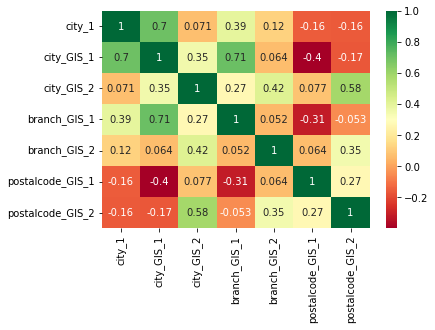

In [359]:
#corr visualization
sns.heatmap(new_df_pp.corr(),annot=True,cmap ='RdYlGn')

In [360]:
X=new_df_pp.loc[:, ['city_GIS_1','city_GIS_2','branch_GIS_1','branch_GIS_2','postalcode_GIS_1','postalcode_GIS_2']]
Y=new_df_pp.loc[:, ["postal code"]]


# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size=0.4)

In [361]:
#performing standard scalar normalization to normalize train set

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [362]:
# Applying PCA 

pca     = PCA()
X_train = pca.fit_transform(X_train)
X_test  = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.38785523, 0.32972999, 0.12425959, 0.06475885, 0.06290888,
       0.03048745])

In [363]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#knn

In [366]:
test_scores_  = []


for i in range(1,15):

    knn = KNeighborsClassifier(i)
    
    knn.fit(X_train,np.ravel(Y_train))
    
    
    
    test_scores_.append(knn.score(X_test,np.ravel(Y_test)))       


In [368]:
max_test_score_ = max(test_scores_)
test_scores_ind_ = [i for i, v in enumerate(test_scores_) if v == max_test_score_]
print('Max test score {} % and k = {}'.format(max_test_score_*100,list(map(lambda x: x+1, test_scores_ind_))))

Max test score 1.5923566878980893 % and k = [12, 13]


In [369]:
knn = KNeighborsClassifier(12)

knn.fit(X_train,np.ravel(Y_train))
knn.score(X_test,np.ravel(Y_test))
Y_pred=knn.predict(X_test)

print('accuracy:', accuracy_score(np.ravel(Y_test),Y_pred))

accuracy: 0.01592356687898089


looks like new solution has failed and its not efficient .